## 1-) Considere os dados apresentados na tabela abaixo. Determine os centroides dos aglomerados "clusters" presentes nos dados, fazendo uso do algoritmo da rede competitiva que corresponde ao algoritmo K-means. Para tanto considere os itens (a) - (c) referentes ao processo de inicialização.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Criando nossos dados
dataset = np.array([
    [-7.82,-4.58,-3.97],
    [-6.68 ,3.16, 2.71],
    [4.36, 2.19 ,2.09],
    [6.72, 0.88, 2.80],
    [-8.64 ,-3.06 ,3.50],
    [-6.87 ,0.57 ,-5.45],
    [4.47 ,-2.62 ,5.76],
    [6.73 ,-2.01 ,4.18],
    [-7.71 ,2.34 ,-6.33],
    [-6.91 ,-0.49 ,-5.68],
    [6.18 ,-2.81 ,5.82],
    [6.72 ,-0.93 ,-4.04],
    [-6.25 ,-0.26 ,0.56],
    [-6.94 ,-1.22 ,1.13],
    [8.09 ,0.20 ,2.25],
    [6.81 ,0.17 ,-4.15],
    [-5.19 ,4.24 ,4.04],
    [-6.38 ,-1.74 ,1.43],
    [4.08 ,3.30 ,5.33],
    [6.27 ,0.93 ,-2.78]
])


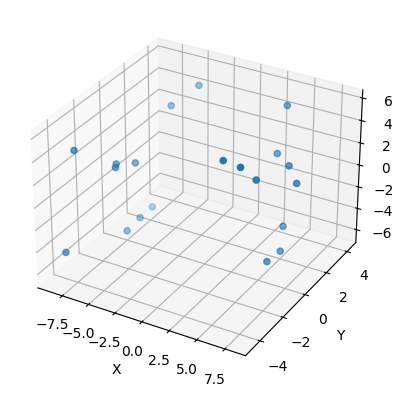

In [4]:
# Plotando em 3D os pontos dos nossos dados
x = dataset[:, 0]
y = dataset[:, 1]
z = dataset[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# a-) Considere que existam três clusters e a inicialização dos centros seja aleatória

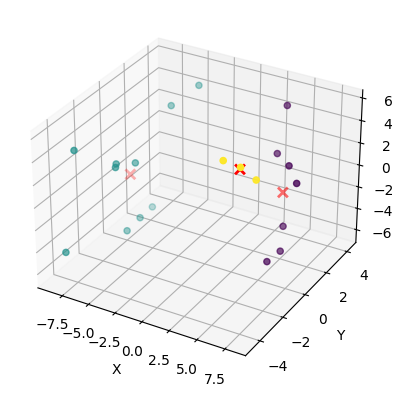

In [8]:
num_clusters = 3
num_iterations = 100

# Inicialização aleatória dos centroides
centroids = dataset[np.random.choice(range(len(dataset)), size=num_clusters, replace=False)]

for _ in range(num_iterations):
    # Cálculo das distâncias entre os pontos e os centroides
    distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=-1)

    # Atribuição dos pontos aos clusters
    cluster_assignments = np.argmin(distances, axis=1)

    # Atualização dos centroides
    for i in range(num_clusters):
        centroids[i] = np.mean(dataset[cluster_assignments == i], axis=0)

# Plotagem dos pontos do dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=cluster_assignments, cmap='viridis')

# Plotagem dos centroides
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=50, linewidths=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## b) Considerar que existam três clusters e a inicialização dos centros seja dada por m1=(0,0,0)^t, m2=(0,1,1)^t, m3=(-1,1,2)^t.

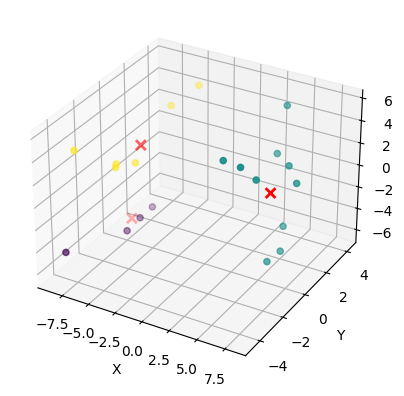

In [9]:
# Número de clusters e iterações
num_clusters = 3
num_iterations = 100

# Inicialização dos centroides especificada
centroids = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [-1, 1, 2]
])

for _ in range(num_iterations):
    # Cálculo das distâncias entre os pontos e os centroides
    distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=-1)

    # Atribuição dos pontos aos clusters
    cluster_assignments = np.argmin(distances, axis=1)

    # Atualização dos centroides
    for i in range(num_clusters):
        centroids[i] = np.mean(dataset[cluster_assignments == i], axis=0)

# Plotagem dos pontos do dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=cluster_assignments, cmap='viridis')

# Plotagem dos centroides
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=50, linewidths=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## c) Repita o item a considerando que os centros iniciais sejam m1=(-0.1,0,0.1)^t, m2=(0,-0.1,0.1)^t, m3=(-0.1,-0.1,0.1)^t. Compare o resultado obtido com o item (a) e explique a razão da diferenças, incluindo o número de interações para alcançar a convergência.

Convergência alcançada na iteração 2


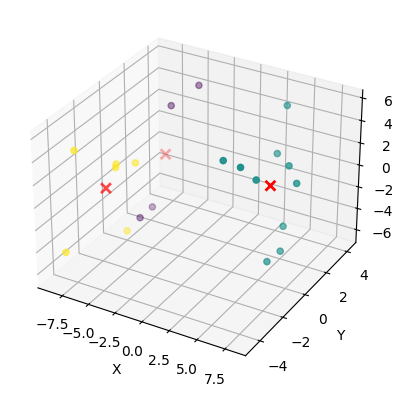

Centroides finais:
[[-6.6125      2.5775     -1.2575    ]
 [ 6.043      -0.07        1.726     ]
 [-7.15666667 -1.89166667 -0.505     ]]


In [10]:
# Número de clusters e iterações
num_clusters = 3
num_iterations = 100

# Inicialização dos centroides especificada
initial_centroids = np.array([
    [-0.1, 0, 0.1],
    [0, -0.1, 0.1],
    [-0.1, -0.1, 0.1]
])

centroids = initial_centroids.copy()

for iteration in range(num_iterations):
    # Cálculo das distâncias entre os pontos e os centroides
    distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=-1)

    # Atribuição dos pontos aos clusters
    cluster_assignments = np.argmin(distances, axis=1)

    # Atualização dos centroides
    new_centroids = np.array([np.mean(dataset[cluster_assignments == i], axis=0) for i in range(num_clusters)])

    # Verificação de convergência
    if np.allclose(centroids, new_centroids):
        print(f"Convergência alcançada na iteração {iteration+1}")
        break

    centroids = new_centroids

# Plotagem dos pontos do dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=cluster_assignments, cmap='viridis')

# Plotagem dos centroides
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=50, linewidths=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Mostrando os centroides finais
print("Centroides finais:")
print(centroids)

Razão das Diferenças
As diferenças entre os resultados obtidos nas duas inicializações podem ser explicadas pela natureza da inicialização dos centroides:

- Centroides Próximos: Quando os centroides iniciais estão próximos entre si (como no segundo caso), eles podem inicialmente competir pelos mesmos pontos de dados, o que pode resultar em uma maior quantidade de iterações necessárias para alcançar a convergência.
- Convergência: A convergência do K-means é influenciada pelos centroides iniciais. Se os centroides iniciais são escolhidos de forma que já estejam próximos dos centros reais dos clusters, o algoritmo converge mais rapidamente.
- Clusters Mal Definidos Inicialmente: A inicialização ruim pode levar a um número maior de iterações e pode resultar em clusters de menor qualidade.